# Image Classification Data (Fashion-MNIST)

Despite its popularity, MNIST is considered as a simple dataset, on which even simple models achieve classification accuracy over 95%. In order to get a better intuition, we will use the qualitatively similat, but comparatively complex Fashion-MNIST dataset came out in 2017 [Xiao et. al. 2017].

In [1]:
# import packages
import d2l
import torch
import torchvision
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Getting the Data

PyTorch provides a similar FashionMNIST class to download and load this data set.

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                             ])

mnist_train = datasets.FashionMNIST('~/datasets/F_MNIST/',
                                 download=True,
                                 train=True,
                                 transform=transform)

mnist_test = datasets.FashionMNIST('~/datasets/F_MNIST/',
                                 download=True,
                                 train=False,
                                transform=transform)

The number of images for each category in the training set and the testing set is 6,000 and 1,000, respectively.
Since there are 10 categories, the numbers of examples in the training set and the test set are 60,000 and
10,000, respectively.

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

There are 10 categories in Fashion-MNIST: t-shirt, trousers, pullover, dress, coat, sandal, shirt, sneaker, bag
and ankle boot. The following function can convert a numeric label into a corresponding text label.

In [4]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']
    return [text_labels[int(i)] for i in labels]

## Reading a Minibatch

In practice, reading data can often be a significant performance bottleneck for training, especially when the
model is simple or when the computer is fast. A handy feature of PyTorch’s DataLoader is the ability to use
multiple processes to speed up data reading. For instance, we can set aside 4 processes to read the data (via num_workers).

In [5]:
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=64, 
                                          shuffle=True, num_workers=4)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=64, 
                                          shuffle=False)

Let's get the first batch:

In [6]:
image, label = next(iter(train_iter))

In [8]:
image.shape

torch.Size([64, 1, 28, 28])

In [9]:
label

tensor([2, 2, 0, 4, 8, 5, 3, 7, 6, 2, 6, 9, 1, 6, 0, 5, 1, 6, 5, 4, 5, 3, 9, 7,
        9, 5, 5, 6, 1, 7, 5, 0, 3, 3, 6, 0, 7, 4, 1, 0, 0, 3, 5, 7, 3, 9, 6, 9,
        4, 1, 1, 0, 2, 2, 5, 7, 3, 8, 6, 9, 5, 8, 6, 8])

Next, let’s take a look at the image contents and text labels for the first few examples in the training data
set.

In [10]:
# taken from d2l but modified to fit to PyTorch
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, image)):
        ax.imshow(img.squeeze(0).numpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])

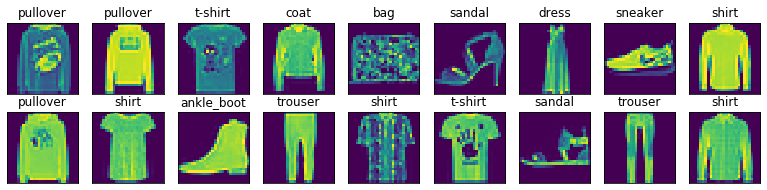

In [11]:
show_images(image, 2, 9, titles=get_fashion_mnist_labels(label))

## Putting all Things together

Now we define the ``load_data_fashion_mnist`` function that obtains and reads the Fashion-MNIST data set. It returns the data iterators for both the training set and validation set. In addition, it accepts an optional
argument to resize images to another shape.

In [12]:
def load_data_fashion_mnist(batch_size, resize=None, num_workers=0):
    tranform_list = []
    if resize:
        tranform_list.append(torchvision.transforms.Resize(resize))
    tranform_list.append(transforms.ToTensor())
    transform = transforms.Compose(tranform_list)
    mnist_train = datasets.FashionMNIST('~/datasets/F_MNIST/',
                                 download=True,
                                 train=True,
                                 transform=transform)

    mnist_test = datasets.FashionMNIST('~/datasets/F_MNIST/',
                                     download=True,
                                     train=False,
                                    transform=transform)
    
    train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, 
                                          shuffle=True, num_workers=num_workers)
    test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, 
                                              shuffle=False)
    return train_iter, test_iter

In [13]:
train_iter, test_iter = load_data_fashion_mnist(32, (64, 64))
for X, y in train_iter:
    print(X.shape)
    break

torch.Size([32, 1, 64, 64])
